### (2)  find_ common_sample between CCLE dataset and PRISM_AUC dataset
(3) find common genes between TCGA dataset and PDAC(53)

export common genes dataset csv file for both TCGA binary mutation dataset and PDAC binary mutation dataset

./TCGA_match_CCLEandPDAC_mutation.txt

./CCLE_match_TCGAandPDAC_mutation.txt

./PDAC_match_TCGAandCCLE_mutation.txt

match CCLE raw expression data **sample names** to 1.raw mutation data and 2.no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC

and match **gene names** to TCGA raw expression data


In [1]:
import pandas as pd

In [19]:
drug_df_path = "../../data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/MACCS(Secondary_Screen_treatment_info)_union_NOrepeat.csv"
drug_df = pd.read_csv( drug_df_path, sep=',', index_col=0)
print("drug_df",drug_df.shape)
drug_df_2 = drug_df.sort_index(axis=0).sort_index(axis=1)
print("drug_df_2",drug_df_2.shape)

print("Unique index count:", drug_df.index.nunique())
print("Total row count:", len(drug_df))
print("Duplicated indices:\n", drug_df.index[drug_df.index.duplicated()])

drug_df (1440, 9)
drug_df_2 (1440, 9)
Unique index count: 1437
Total row count: 1440
Duplicated indices:
 Index(['CYCLOSPORIN-A', 'AY-22989', 'U-0126'], dtype='object', name='Name')


In [9]:
PRISMparametersDF = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/prism-repurposing-20q2-secondary-screen-dose-response-curve-parameters.csv",
                      sep=',')
PRISMparametersDF = PRISMparametersDF[~PRISMparametersDF["broad_id"].isin(["BRD-K50010139-001-02-3", "BRD-K56981171-001-01-0"])]

/tmp/ipykernel_64452/4169809713.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  PRISMparametersDF = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/prism-repurposing-20q2-secondary-screen-dose-response-curve-parameters.csv",


In [7]:
# Define the screen_id priority mapping
screen_priority = {"MTS010": 1, "HTS002": 2, "MTS006": 3}
# Assume df is already loaded and includes columns: 'depmap_id', 'broad_id', 'screen_id', 'r2'
# Map the priority to a new column
PRISMparametersDF["screen_priority"] = PRISMparametersDF["screen_id"].map(screen_priority)
# Sort by drug-cell line pair (broad_id, depmap_id), screen_priority, and descending r2
df_sorted = PRISMparametersDF.sort_values(by=["broad_id", "depmap_id", "screen_priority", "r2"], ascending=[True, True, True, False])
# Drop duplicates keeping the best quality measurement
df_filtered = df_sorted.drop_duplicates(subset=["broad_id", "depmap_id"], keep="first")
print(df_filtered.shape)

(698666, 21)


In [10]:
duplicate_pairs = df_filtered.groupby(["depmap_id", "broad_id"]).size()
duplicate_pairs = duplicate_pairs[duplicate_pairs > 1]
print(duplicate_pairs)

Series([], dtype: int64)


In [12]:
matrx_df = df_filtered.pivot(index="depmap_id", columns="broad_id", values="ic50")
matrx_df

broad_id,BRD-A00077618-236-07-6,BRD-A00758722-001-04-9,BRD-A01643550-001-04-9,BRD-A02180903-001-04-5,BRD-A03216249-003-24-3,BRD-A03506276-001-01-5,BRD-A03623303-045-09-5,BRD-A03757454-001-03-4,BRD-A03932035-004-04-3,BRD-A05906449-004-01-1,...,BRD-K99946902-001-07-5,BRD-K99964838-001-11-9,BRD-M29182745-001-01-4,BRD-M80207679-001-01-5,BRD-M89827113-001-01-5,BRD-M92675308-003-07-1,BRD-M97302542-001-03-6,BRD-M97302542-001-04-4,BRD-U25960968-000-01-9,BRD-U45393375-000-01-6
depmap_id,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,3.520311,2.246324,NaN,NaN,0.104903,NaN,NaN,3.549847,1.602156,...,12.858125,NaN,NaN,NaN,NaN,3.194828,0.496742,NaN,0.117294,NaN
ACH-000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002446,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2554,NaN,NaN
ACH-000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-001745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-001750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045427,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
LN_IC50_df = pd.read_csv("/root/data/DAPL/share/gdsc1+2_ccle_Z_SCORE.csv",
                      sep=',', index_col=0)
print(LN_IC50_df.shape)#(966ccl, 394drug)

(966, 394)


In [13]:
drug_medians = LN_IC50_df.median(axis=0)# Step 1: Calculate median for each drug (column-wise)
# Step 2: Generate binary response, preserve NaNs. 1 if < median (sensitive), 0 if >= median (resistant)
binary_df = LN_IC50_df.lt(drug_medians, axis=1)     # True for sensitive
binary_df = binary_df.where(~LN_IC50_df.isna())     # Set NaNs back to NaN
binary_df = binary_df.astype("float")       # Convert to float so we can keep NaN
binary_df = binary_df.replace({True: 1.0, False: 0.0})
binary_df.to_csv("/root/data/DAPL/share/GDSC1+2_ZscoreLNic50_binaryMatrix_by_per_drug_median.csv")# Step 3: Save to CSV

In [14]:
# 統計每個藥的 Sensitive (1) 和 Resistant (0) 數量
resistant_counts = (binary_df == 0).sum(axis=0)
sensitive_counts = (binary_df == 1).sum(axis=0)

# 合併成一個統計表
summary_df = pd.DataFrame({
    'Sensitive_Count': sensitive_counts,
    'Resistant_Count': resistant_counts
})
summary_df['Threshold'] = drug_medians
summary_df.to_csv("/root/data/DAPL/share/GDSC1+2_ZscoreLNic50_binary_by_per_drug_median_sen_res_counts.csv")

In [ ]:
# 計算每個藥（每欄）的 skewness（會自動忽略 NaN）
drug_skewness = LN_IC50_df.skew(axis=0)
# 顯示最左偏和最右偏的前幾個藥物
print("🔻 GDSC1+2 Zscore LNic50 左偏最明顯的藥物(skewness)：")
print(drug_skewness.sort_values().head())

print("\n🔺 GDSC1+2 Zscore LNic50 右偏最明顯的藥物(skewness)：")
print(drug_skewness.sort_values(ascending=False).head())

gsk343              0.158304
flavopiridol        0.975357
axitinib           -1.100326
camptothecin        0.528354
zibotentan         -0.761210
                      ...   
cyclophosphamide    0.339168
olaparib           -0.304562
docetaxel           0.405464
topotecan           0.241397
bms-509744          0.182870
Length: 394, dtype: float64
🔻 GDSC1+2 Zscore LNic50 左偏最明顯的藥物(skewness)：
linifanib     -4.195298
quizartinib   -3.207618
alectinib     -2.812803
imatinib      -2.713261
ic-87114      -2.340162
dtype: float64

🔺 GDSC1+2 Zscore LNic50 右偏最明顯的藥物(skewness)：
mg-132            1.772210
piperlongumine    1.393593
jnk-9l            1.248349
dinaciclib        1.207241
bortezomib        1.206495
dtype: float64


In [11]:
# 計算每個藥（每欄）的 skewness（會自動忽略 NaN）
drug_skewness = LN_IC50_df.mean(axis=0)
# 顯示最左偏和最右偏的前幾個藥物
print("🔻 GDSC1+2 Zscore LNic50 bottom5 mean drug：")
print(drug_skewness.sort_values().head())

print("\n🔺 GDSC1+2 Zscore LNic50 top5 mean drug：")
print(drug_skewness.sort_values(ascending=False).head())

🔻 GDSC1+2 Zscore LNic50 bottom5 mean drug：
temozolomide   -0.289546
mira-1         -0.254575
amg-319        -0.253323
epz5676        -0.221324
zoledronate    -0.215364
dtype: float64

🔺 GDSC1+2 Zscore LNic50 top5 mean drug：
osi-027               0.154506
trametinib            0.152678
sch772984             0.145418
vx-11e                0.107477
obatoclax mesylate    0.105448
dtype: float64


/tmp/ipykernel_50697/4247565759.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Better default style


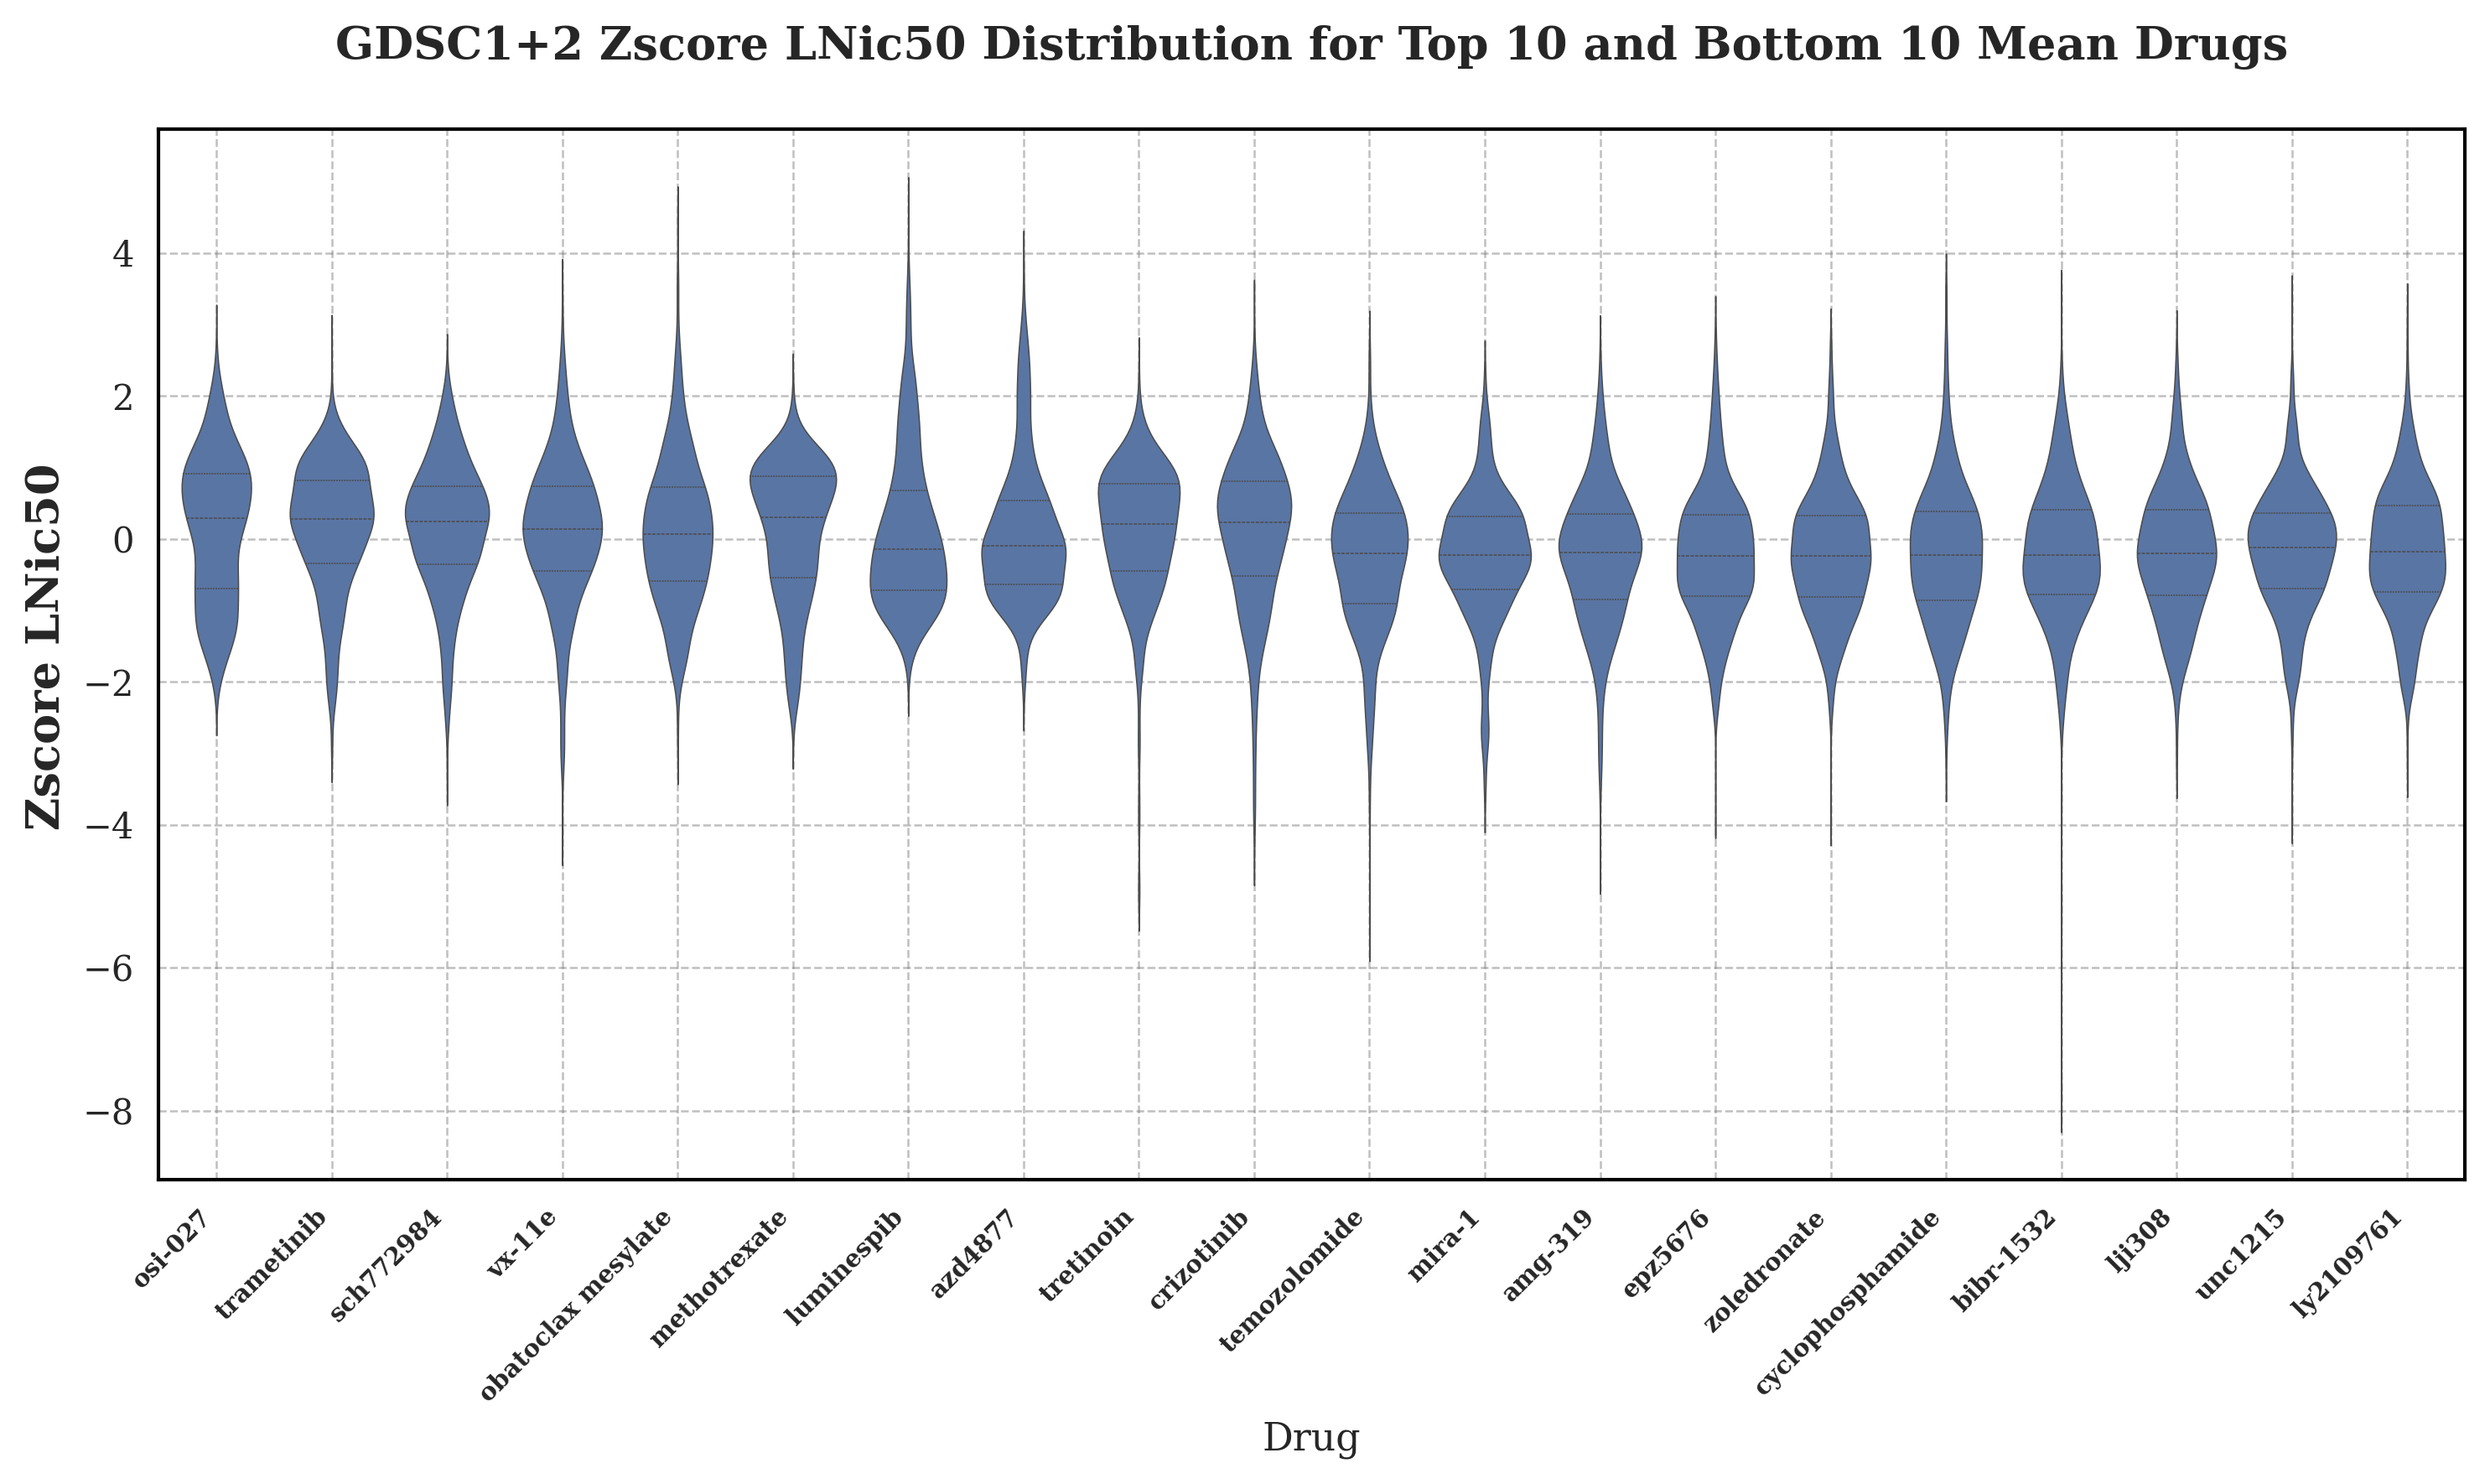

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import re
# Set Matplotlib and Seaborn styles
plt.style.use('seaborn')  # Better default style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 300  # Higher resolution
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 6)  # Slightly larger figure
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 1.0
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['svg.fonttype'] = 'none'  # Use system fonts in SVG
plt.rcParams['pdf.fonttype'] = 42  # Use Type 42 (TrueType) fonts
plt.rcParams["font.family"] = "serif"

# Load data
LN_IC50_df = pd.read_csv("/root/data/DAPL/share/gdsc1+2_ccle_Z_SCORE.csv",
                      sep=',', index_col=0)

# Calculate mean AUC for each drug
drug_skewness = LN_IC50_df.skew(axis=0)

# Select top 10 and bottom 10 drugs
top10_drugs = drug_skewness.sort_values(ascending=False).head(10).index
bottom10_drugs = drug_skewness.sort_values(ascending=True).head(10).index
selected_drugs = top10_drugs.tolist() + bottom10_drugs.tolist()

# Subset data
subset_df = LN_IC50_df[selected_drugs]

# Convert to long-format
melted_df = subset_df.melt(var_name='Drug', value_name='Zscore LNic50')

# Clean drug names by removing parentheses and contents
melted_df['Drug'] = melted_df['Drug'].str.replace(r"\s*\(.*?\)", "", regex=True)

# Create violin plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=melted_df, x='Drug', y='Zscore LNic50', inner='quartile')

# Customize grid
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)
# Customize axes spines (plot edges)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right',fontsize=7,fontweight='bold')
plt.xlabel('Drug', fontsize=13,fontweight='bold')
plt.ylabel('Zscore LNic50', fontsize=13,fontweight='bold')
# Set title
plt.title('GDSC1+2 Zscore LNic50 Distribution for Top 10 and Bottom 10 Skewness Drugs', pad=20,fontsize=13,fontweight='bold')
# Ensure tight layout
plt.tight_layout()
# Show plot
plt.show()

In [24]:
AUC_df = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted_NOrepeat.csv",
                      sep=',', index_col=0)
print(AUC_df.shape)#(480ccl, 1442drug)

(480, 1440)


In [18]:
# 計算每個藥（每欄）的 skewness（會自動忽略 NaN）
drug_skewness = AUC_df.skew(axis=0)
# 顯示最左偏和最右偏的前幾個藥物
print("🔻 PRISM AUDRC 左偏最明顯的藥物(skewness)：")
print(drug_skewness.sort_values().head())

print("\n🔺 PRISM AUDRC 右偏最明顯的藥物(skewness)：")
print(drug_skewness.sort_values(ascending=False).head())

🔻 PRISM AUDRC 左偏最明顯的藥物(skewness)：
CEFPIRAMIDE (BRD:BRD-K92872987-001-02-9)   -3.660429
INDIPLON (BRD:BRD-K90948141-001-01-4)      -3.568765
TEROXIRONE (BRD:BRD-A39935389-001-05-9)    -3.266891
LOMITAPIDE (BRD:BRD-K92213669-001-01-3)    -3.236877
JOSAMYCIN (BRD:BRD-K25837718-001-03-8)     -3.045807
dtype: float64

🔺 PRISM AUDRC 右偏最明顯的藥物(skewness)：
SANGIVAMYCIN (BRD:BRD-A64064900-001-02-3)     7.420591
PIK-75 (BRD:BRD-K49371609-003-03-8)           2.151985
DOLASTATIN-10 (BRD:BRD-K78567475-001-01-4)    2.010912
STF-118804 (BRD:BRD-K39171998-001-01-1)       1.965697
TRIPTOLIDE (BRD:BRD-K39484304-001-16-5)       1.928975
dtype: float64


In [25]:
AUC_df_standardized = AUC_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
drug_medians = AUC_df_standardized.median(axis=0)# Step 1: Calculate median for each drug (column-wise)
# Step 2: Generate binary response, preserve NaNs. 1 if < median (sensitive), 0 if >= median (resistant)
binary_df = AUC_df_standardized.lt(drug_medians, axis=1)     # True for sensitive
binary_df = binary_df.where(~AUC_df_standardized.isna())     # Set NaNs back to NaN
binary_df = binary_df.astype("float")       # Convert to float so we can keep NaN
binary_df = binary_df.replace({True: 1.0, False: 0.0})
binary_df.to_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/PRISM_zscoreAUDRC_binaryMatrix_by_per_drug_median.csv.csv")# Step 3: Save to CSV

In [26]:
# 統計每個藥的 Sensitive (1) 和 Resistant (0) 數量
resistant_counts = (binary_df == 0).sum(axis=0)
sensitive_counts = (binary_df == 1).sum(axis=0)

# 合併成一個統計表
summary_df = pd.DataFrame({
    'Sensitive_Count': sensitive_counts,
    'Resistant_Count': resistant_counts
})
summary_df['Threshold'] = drug_medians
summary_df.to_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/PRISM_zscoreAUDRC_binary_by_per_drug_median_sen_res_counts.csv")

(480, 1442)
8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6)                  0.924754
NORETYNODREL (BRD:BRD-A00758722-001-04-9)                  0.896677
PREDNISOLONE-ACETATE (BRD:BRD-A01643550-001-04-9)          0.892481
BETAMETHASONE (BRD:BRD-A02180903-001-04-5)                 0.886166
MEPIVACAINE (BRD:BRD-A03216249-003-24-3)                   0.927177
                                                             ...   
CROMAKALIM (BRD:BRD-M89827113-001-01-5)                    0.913227
EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1)    0.903049
DICHLOROACETATE (BRD:BRD-M97302542-001-04-4)               0.930674
TYLOXAPOL (BRD:BRD-U25960968-000-01-9)                     0.897212
SEVELAMER (BRD:BRD-U45393375-000-01-6)                     0.937834
Length: 1442, dtype: float64
🔝 Top 10 drugs (highest average AUC):
XYLAZINE (BRD:BRD-K21565985-001-22-5)                            0.974531
FK-888 (BRD:BRD-K83508485-001-02-7)                              0.970135
SODIUM-TANSHINONE-II-A-SU

/tmp/ipykernel_4514/1865006089.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Drug', y='AUC', palette='coolwarm')


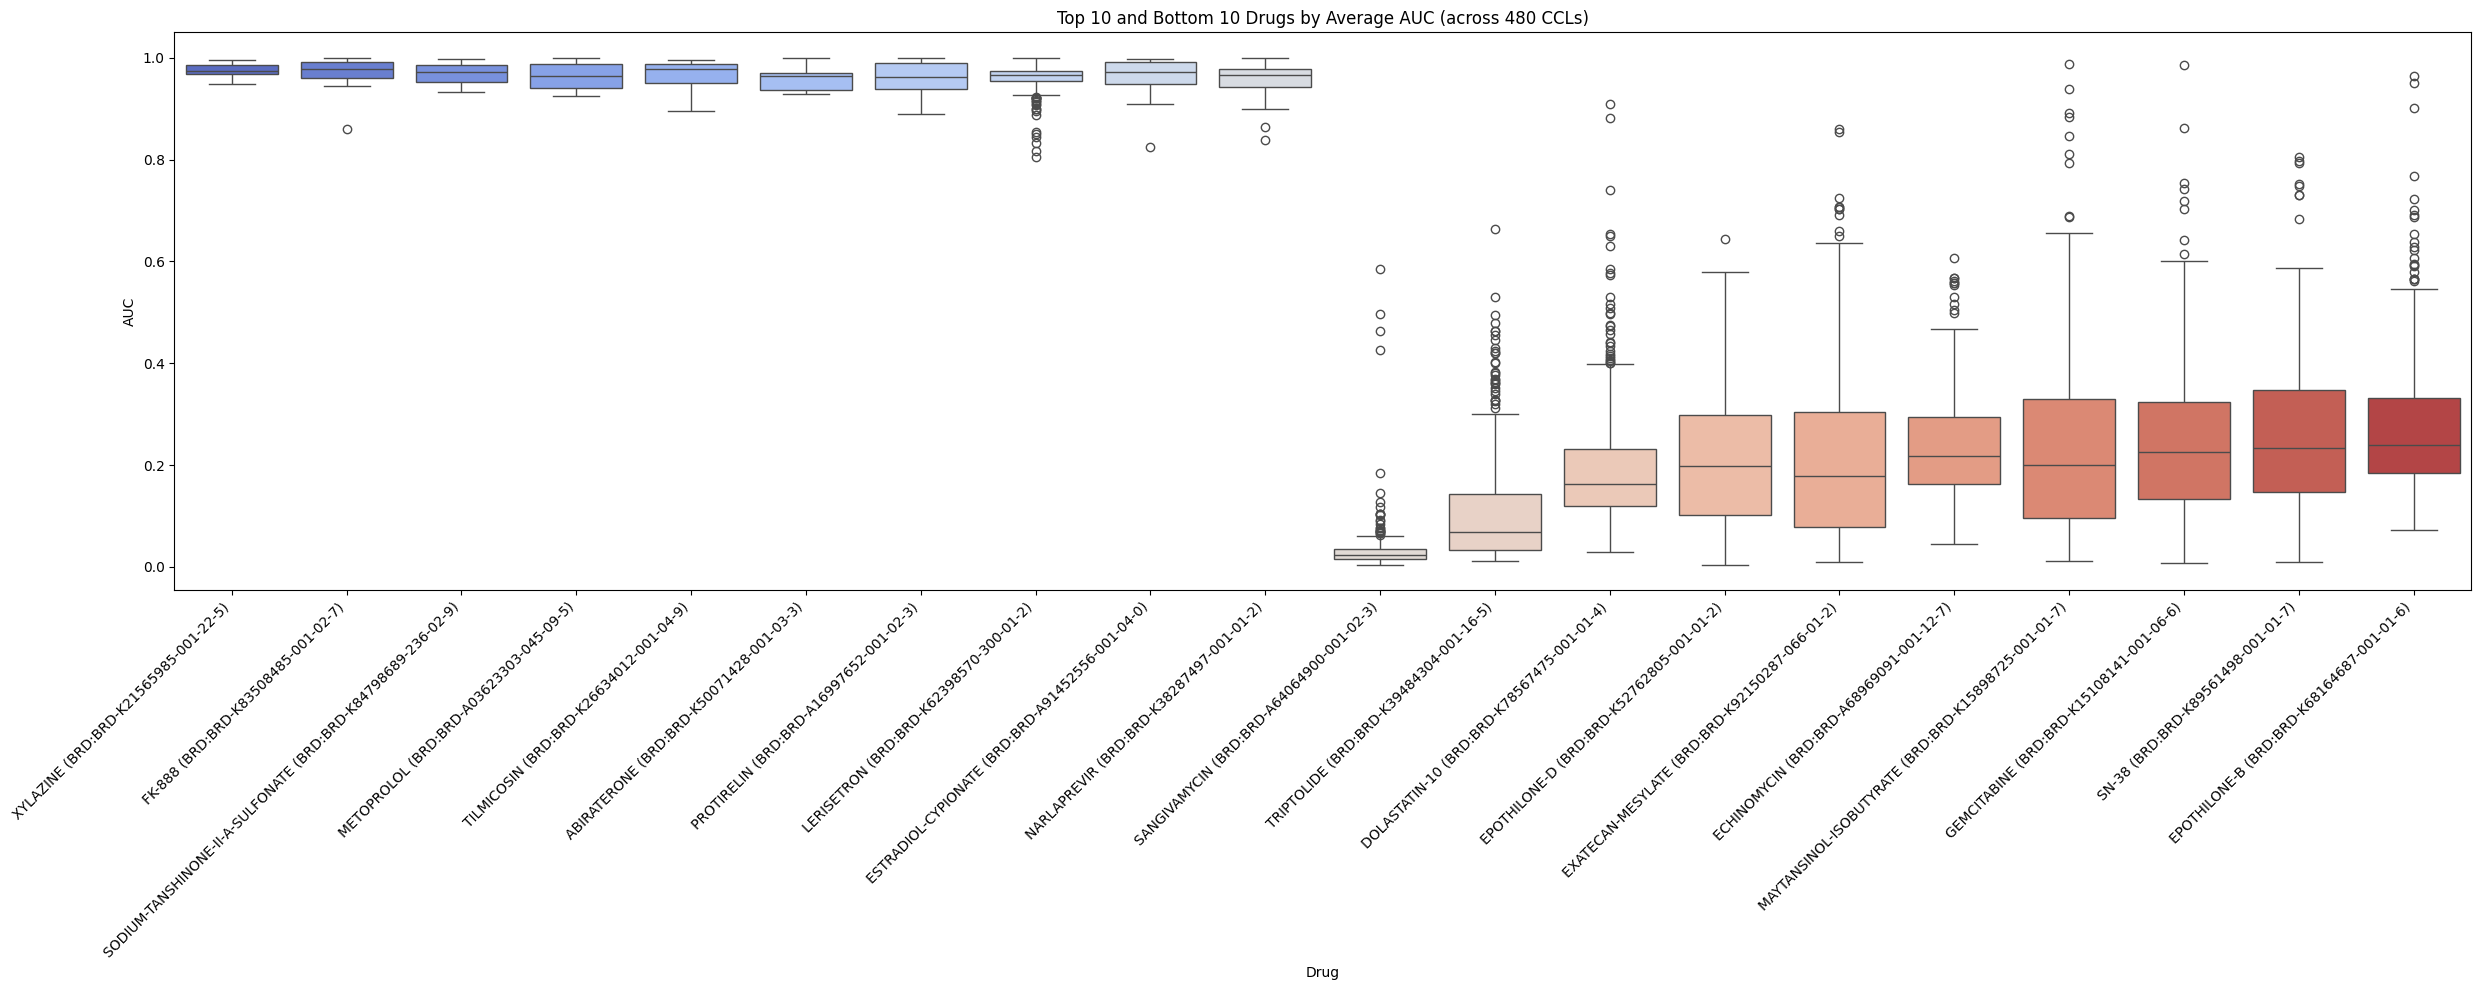

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
AUC_df = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted_NOrepeat.csv",
                      sep=',', index_col=0)
print(AUC_df.shape)#(480ccl, 1442drug)
drug_mean_auc = AUC_df.mean(axis=0)
print(drug_mean_auc)
# 取出 top10 和 bottom10
top10_drugs = drug_mean_auc.sort_values(ascending=False).head(10).index
bottom10_drugs = drug_mean_auc.sort_values(ascending=True).head(10).index
print("🔝 Top 10 drugs (highest average AUC):")
print(drug_mean_auc.sort_values(ascending=False).head(10))
print("\n🔻 Bottom 10 drugs (lowest average AUC):")
print(drug_mean_auc.sort_values(ascending=True).head(10))
selected_drugs = top10_drugs.tolist() + bottom10_drugs.tolist()

# 篩選資料
subset_df = AUC_df[selected_drugs]

# 將 wide-format 轉成 long-format 以利繪圖
melted_df = subset_df.melt(var_name='Drug', value_name='AUC')

# 畫圖
plt.figure(figsize=(25, 10))
sns.boxplot(data=melted_df, x='Drug', y='AUC', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 and Bottom 10 Drugs by Average AUC (across 480 CCLs)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_31739/3454750456.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Better default style


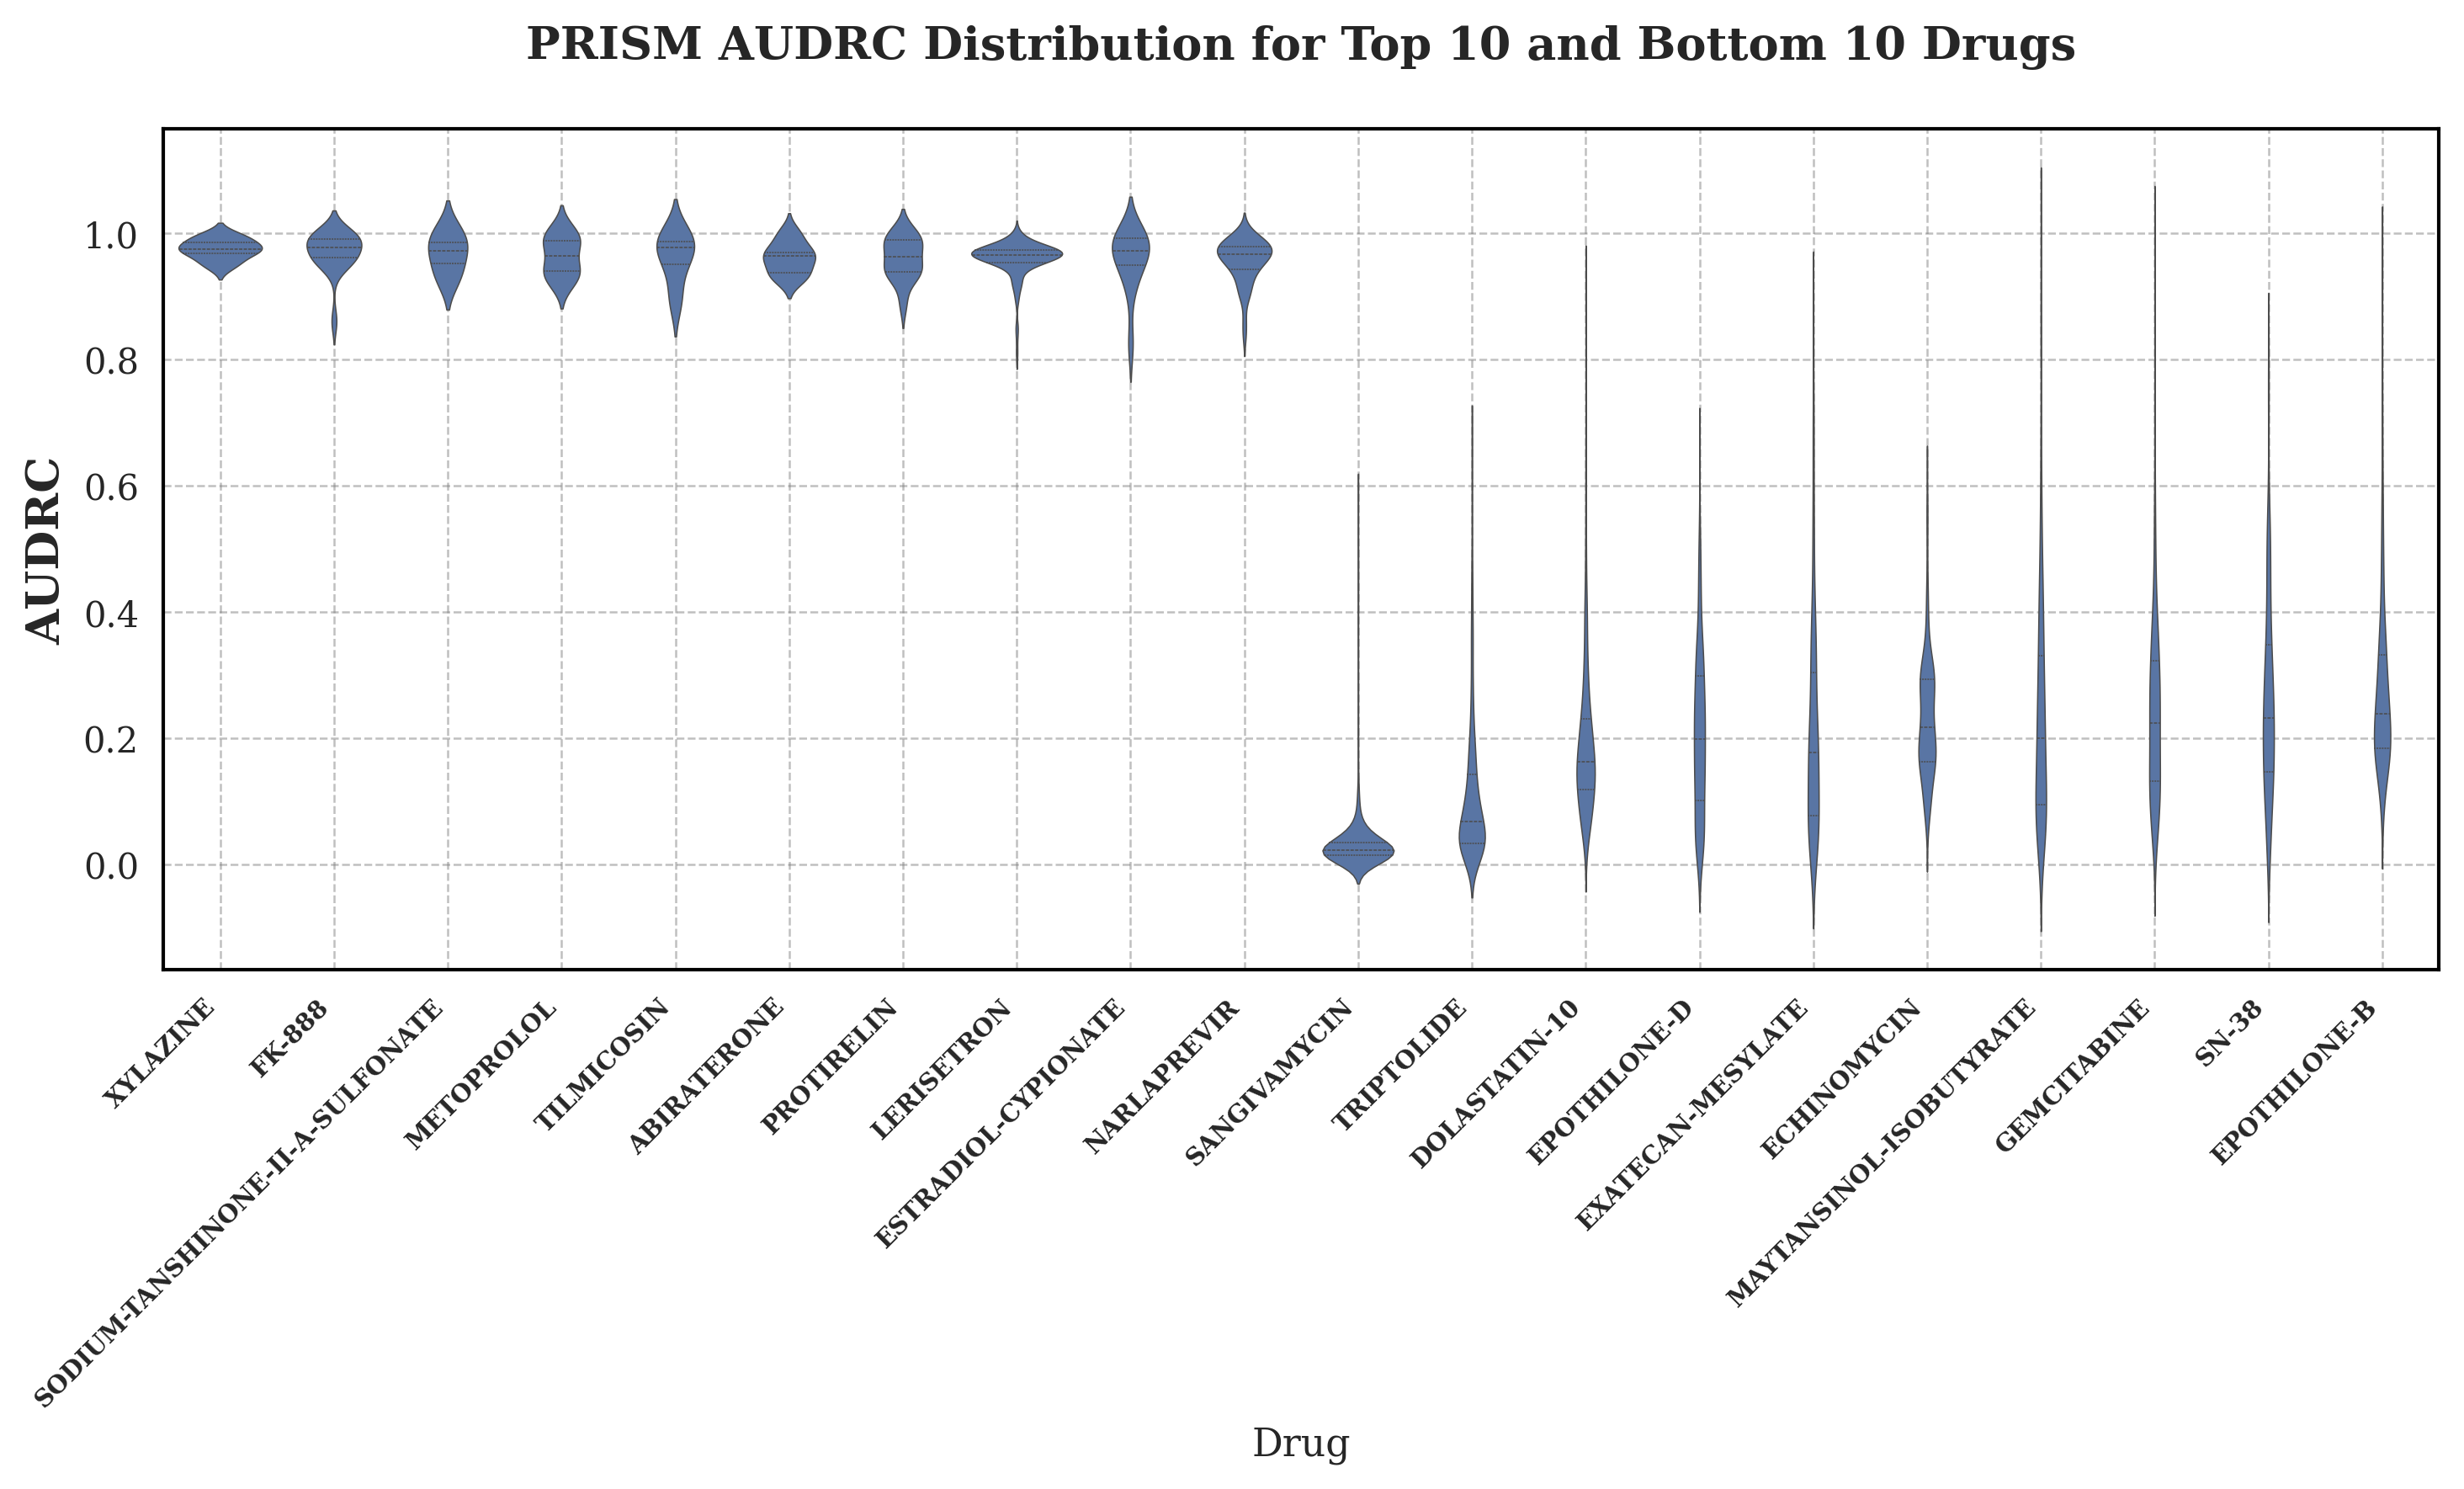

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import re

# Set Matplotlib and Seaborn styles
plt.style.use('seaborn')  # Better default style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 300  # Higher resolution
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 6)  # Slightly larger figure
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 1.0
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['svg.fonttype'] = 'none'  # Use system fonts in SVG
plt.rcParams['pdf.fonttype'] = 42  # Use Type 42 (TrueType) fonts
plt.rcParams["font.family"] = "serif"

# Load data
AUC_df = pd.read_csv(
    "/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted_NOrepeat.csv",
    sep=',', index_col=0
)

# Calculate mean AUC for each drug
drug_mean_auc = AUC_df.mean(axis=0)

# Select top 10 and bottom 10 drugs
top10_drugs = drug_mean_auc.sort_values(ascending=False).head(10).index
bottom10_drugs = drug_mean_auc.sort_values(ascending=True).head(10).index
selected_drugs = top10_drugs.tolist() + bottom10_drugs.tolist()

# Subset data
subset_df = AUC_df[selected_drugs]

# Convert to long-format
melted_df = subset_df.melt(var_name='Drug', value_name='AUDRC')

# Clean drug names by removing parentheses and contents
melted_df['Drug'] = melted_df['Drug'].str.replace(r"\s*\(.*?\)", "", regex=True)

# Create violin plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=melted_df, x='Drug', y='AUDRC', inner='quartile')

# Customize grid
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)
# Customize axes spines (plot edges)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right',fontsize=7,fontweight='bold')
plt.ylabel('AUDRC', fontsize=13,fontweight='bold')
# Set title
plt.title('PRISM AUDRC Distribution for Top 10 and Bottom 10 Drugs', pad=20,fontsize=13,fontweight='bold')
# Ensure tight layout
plt.tight_layout()
# Show plot
plt.show()

In [ ]:
import pickle
with open(f"../../data/DAPL/share/pretrain/VAE_w10SC/ccle_latent_results.pkl", 'rb') as f:
    latent_dict = pickle.load(f)
    CCLEexp_df = pd.DataFrame(latent_dict).T
    print(CCLEexp_df.shape)
# df1426 = pd.read_csv(f"../../data/DAPL/share/ccle_uq1000_feature_sorted.csv", sep=',', index_col=0)
df4692 = pd.read_csv(f"../../data/CCLE/CCLE_exp_476samples_4692genes.csv", sep=',', index_col=0)
# dfRow= pd.read_csv(f"../../data/CCLE/Expression_Public_23Q4_subsetted.csv", sep=',', index_col=0)
# print(df1426.shape)
print(df4692.shape)
# print(dfRow.shape)

(1305, 32)
(476, 4692)


In [ ]:
print((CCLEexp_df.index.intersection(df4692.index)).shape)
CCLEexp_df_match = CCLEexp_df.loc[df4692.index.intersection(CCLEexp_df.index), :]
print(CCLEexp_df_match.shape)
CCLEexp_df_match.to_pickle(f"../../data/DAPL/share/pretrain/VAE_w10SC/ccle_exp_476_32embeddings.pkl")
# CCLEexp_df_match.to_csv(f"../../data/DAPL/share/pretrain/VAE/ccle_exp_476_32embeddings.csv", sep=',')

(476,)
(476, 32)


In [ ]:
print((df4692.index.intersection(df1426.index)).shape)
df1426_match = df1426.loc[df4692.index.intersection(df1426.index), :]
print(df1426_match.shape)
df1426_match.to_csv(f"../../data/CCLE/ccle_exp_476_1426.csv", sep=',')

(476,)
(476, 1426)


In [24]:
print((dfRow.columns.intersection(df1426.columns)).shape)


(1305,)


In [59]:
TCGAexp4692df= pd.read_csv(f"../../data/TCGA/TCGA_exp_matchCCLEgenes_8238samples_4692genes.txt", sep='\t', index_col=0)
print(TCGAexp4692df.shape)
TCGAexp4692df.index = TCGAexp4692df.index.str.slice(0, -3)
print(TCGAexp4692df.index)

(8238, 4692)
Index(['TCGA-02-0047', 'TCGA-02-0055', 'TCGA-02-2483', 'TCGA-02-2485',
       'TCGA-05-4244', 'TCGA-05-4250', 'TCGA-05-4382', 'TCGA-05-4384',
       'TCGA-05-4389', 'TCGA-05-4390',
       ...
       'TCGA-ZP-A9D4', 'TCGA-ZQ-A9CR', 'TCGA-ZR-A9CJ', 'TCGA-ZS-A9CD',
       'TCGA-ZS-A9CE', 'TCGA-ZS-A9CF', 'TCGA-ZS-A9CG', 'TCGA-ZT-A8OM',
       'TCGA-ZU-A8S4', 'TCGA-ZX-AA5X'],
      dtype='object', name='sample_name', length=8238)


In [60]:
drug_list=["cisplatin", "5-fluorouracil", "gemcitabine", "sorafenib", "temozolomide"] #["cisplatin"]#

for drug_name in drug_list:
    TCGAexp_1426df = pd.read_csv(f"../../data/DAPL/share/TCGA_fromDAPL/{drug_name}/tcgadata.csv", sep=',', index_col=0) #1426
    print(TCGAexp_1426df.shape)
    print(TCGAexp_1426df.index.intersection(TCGAexp4692df.index))
    print(TCGAexp_1426df.index.difference(TCGAexp4692df.index))
    TCGAexp4692df_match = TCGAexp4692df.loc[TCGAexp_1426df.index.intersection(TCGAexp4692df.index), :]
    print(TCGAexp4692df_match.shape)
    TCGAexp4692df_match.to_csv(f"../../data/DAPL/share/TCGA_fromDAPL/{drug_name}/tcgadata_4692genes.csv", sep=',')
    label_df = pd.read_csv(f"../../data/DAPL/share/TCGA_fromDAPL/{drug_name}/tcgalabel.csv", sep=',', index_col=0) # 1: sensitive, 0: resistant
    label_df_match = label_df.loc[TCGAexp_1426df.index.intersection(TCGAexp4692df.index), :]
    print(label_df_match.shape)
    label_df_match.to_csv(f"../../data/DAPL/share/TCGA_fromDAPL/{drug_name}/tcgalabel_4692genes.csv", sep=',')

(40, 1426)
Index(['TCGA-CG-5724', 'TCGA-90-A59Q', 'TCGA-55-7910', 'TCGA-BA-5149',
       'TCGA-BA-6873', 'TCGA-BA-A4IF', 'TCGA-BA-A6D8', 'TCGA-BA-A6DD',
       'TCGA-BA-A6DI', 'TCGA-BA-A6DJ', 'TCGA-BB-A5HY', 'TCGA-CN-4726',
       'TCGA-CN-4736', 'TCGA-CN-5374', 'TCGA-CN-6010', 'TCGA-CN-6013',
       'TCGA-CN-6998', 'TCGA-CQ-7065', 'TCGA-CQ-A4CH', 'TCGA-H7-A6C4',
       'TCGA-IQ-A61G', 'TCGA-P3-A6T3', 'TCGA-UF-A7JC', 'TCGA-UF-A7JK',
       'TCGA-UF-A7JT', 'TCGA-3B-A9HT', 'TCGA-C5-A0TN', 'TCGA-C5-A1BF',
       'TCGA-DS-A0VM', 'TCGA-DS-A7WF', 'TCGA-DS-A7WI', 'TCGA-HM-A3JJ',
       'TCGA-VS-A9U6', 'TCGA-VS-A9UP', 'TCGA-VS-A9UR', 'TCGA-VS-A9UY',
       'TCGA-VS-A9V0', 'TCGA-VS-A9V1', 'TCGA-VS-A9V3', 'TCGA-VS-A9V4'],
      dtype='object')
Index([], dtype='object')
(40, 4692)
(40, 1)
(21, 1426)
Index(['TCGA-HU-8243', 'TCGA-RD-A7BS', 'TCGA-RD-A8MW', 'TCGA-VQ-A8DT',
       'TCGA-VQ-A8DU', 'TCGA-VQ-A8PD', 'TCGA-VQ-A8PP', 'TCGA-VQ-A91D',
       'TCGA-VQ-A91N', 'TCGA-VQ-A91Q', 'TCGA-VQ-A91Y', 'TC

In [62]:
import time
struct_time   = time.localtime()
year_month    = time.strftime("%Y-%m%2d", struct_time)
print(year_month)

2025-0520


In [2]:
#
# Specify the file path
filename = "/root/data/TCGA/mc3.v0.2.8.PUBLIC.maf"
maf_df = pd.read_csv(filename, sep='\t', comment='#', low_memory=False)
# View the first few rows
print(maf_df.head())
for i in maf_df.iloc[0]:
    print(i)

  Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0       TACC2               0      .     GRCh37         10       123810032   
1     JAKMIP3               0      .     GRCh37         10       133967449   
2       PANX3               0      .     GRCh37         11       124489539   
3        SPI1               0      .     GRCh37         11        47380512   
4     NAALAD2               0      .     GRCh37         11        89868837   

   End_Position Strand Variant_Classification Variant_Type  ... ExAC_AF_NFE  \
0     123810032      +      Missense_Mutation          SNP  ...           .   
1     133967449      +                 Silent          SNP  ...           .   
2     124489539      +      Missense_Mutation          SNP  ...           .   
3      47380512      +      Missense_Mutation          SNP  ...           .   
4      89868837      +      Missense_Mutation          SNP  ...           .   

  ExAC_AF_OTH ExAC_AF_SAS GENE_PHENO FILTER             

In [3]:
maf_df.shape

(3600963, 114)

In [8]:
Cell_lines_annotations_20181226 = pd.read_csv("/root/data/CCLE/Cell_lines_annotations_20181226.txt", sep='\t', index_col=0)
Model = pd.read_csv("/root/data/ccl tissue type/Model.csv", sep=',', index_col=0)
Sample_info_summary = pd.read_csv("/root/data/ccl tissue type/Sample_info_summary.csv", sep=',', index_col=0)
secondary_screen_cell_line_info = pd.read_csv("/root/data/ccl tissue type/secondary-screen-cell-line-info (19Q4).csv", sep=',', index_col=0)

AUC_df = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted.csv",
                      sep=',', index_col=0)

print(Cell_lines_annotations_20181226.shape) #["Site_Primary"]
print(Model.shape) #["OncotreeLineage"]
print(Sample_info_summary.shape) #["sample_collection_site"]
print(secondary_screen_cell_line_info.shape) #["primary_tissue"]
print(AUC_df.shape) #


(1461, 32)
(1959, 42)
(480, 13)
(588, 6)
(480, 1442)


In [9]:
Model["CCLEName"]

ModelID
ACH-001401           SW13_ADRENAL_CORTEX
ACH-001598    NCIH295R_AUTONOMIC_GANGLIA
ACH-000182          SNU869_BILIARY_TRACT
ACH-000377          SNU478_BILIARY_TRACT
ACH-001862       TGBC52TKB_BILIARY_TRACT
                         ...            
ACH-003132                           NaN
ACH-003133                           NaN
ACH-003134                           NaN
ACH-003136                           NaN
ACH-003147                           NaN
Name: CCLEName, Length: 1959, dtype: object

In [10]:
all_indices = Cell_lines_annotations_20181226.index.union(Model.index).union(Sample_info_summary.index).union(secondary_screen_cell_line_info.index)

In [13]:
all_indices

Index(['ACH-000001', 'ACH-000002', 'ACH-000003', 'ACH-000004', 'ACH-000005',
       'ACH-000006', 'ACH-000007', 'ACH-000008', 'ACH-000009', 'ACH-000010',
       ...
       'CONTROL_BARCODE_1', 'CONTROL_BARCODE_10', 'CONTROL_BARCODE_2',
       'CONTROL_BARCODE_3', 'CONTROL_BARCODE_4', 'CONTROL_BARCODE_5',
       'CONTROL_BARCODE_6', 'CONTROL_BARCODE_7', 'CONTROL_BARCODE_8',
       'CONTROL_BARCODE_9'],
      dtype='object', length=1990)

In [12]:
all_indices = all_indices.dropna()

In [14]:
file1 = Cell_lines_annotations_20181226[~Cell_lines_annotations_20181226.index.isna()].reindex(all_indices)
file2 = Model[~Model.index.isna()].reindex(all_indices)
file3 = Sample_info_summary[~Sample_info_summary.index.isna()].reindex(all_indices)
file4 = secondary_screen_cell_line_info[~secondary_screen_cell_line_info.index.isna()].reindex(all_indices)


print(file1.shape) #["Site_Primary"]
print(file2.shape) #["OncotreeLineage"]
print(file3.shape) #["sample_collection_site"]
print(file4.shape) #["primary_tissue"]


(1990, 32)
(1990, 42)
(1990, 13)
(1990, 6)


In [15]:
file4["primary_tissue"][0]

'ovary'

In [16]:
new_file = pd.DataFrame({
    "Cell_lines_annotations_20181226[Site_Primary]": file1["Site_Primary"],
    "secondary_screen_cell_line_info[primary_tissue]": file4["primary_tissue"],
    "Model[OncotreeLineage]": file2["OncotreeLineage"],
    "Model[SampleCollectionSite]": file2["SampleCollectionSite"],
    "Model[CCLEName]": file2["CCLEName"],
    "Sample_info_summary[sample_collection_site]": file3["sample_collection_site"],

    "Model[OncotreeCode]": file2["OncotreeCode"],
    "Model[DepmapModelType]": file2["DepmapModelType"],
    "Cell_lines_annotations_20181226[tcga_code]": file1["tcga_code"],
    
})


In [17]:
file_path = "/root/data/ccl tissue type/total file tissue type 1990ccl.csv"
new_file.to_csv(file_path, sep=',', index_label='ccl_ID') 

In [18]:
matched_samples = sorted(set(AUC_df.T.columns) & set(Model.T.columns))
print(len(matched_samples))
Model_match_auc = Model.T[matched_samples]
print(Model_match_auc.shape)
file_path = f'/root/data/ccl tissue type/Model {len(matched_samples)}ccl.csv'
Model_match_auc.T.to_csv(file_path, sep=',', index_label='ccl_ID') 

480
(42, 480)


In [20]:
matched_samples = sorted(set(AUC_df.T.columns) & set(new_file.T.columns))
print(len(matched_samples))
new_file_match_auc = new_file.T[matched_samples]
print(new_file_match_auc.shape)
file_path = f'/root/data/ccl tissue type/total file tissue type {len(matched_samples)}ccl.csv'
new_file_match_auc.T.to_csv(file_path, sep=',', index_label='ccl_ID') 

480
(9, 480)


In [5]:
matched_samples = sorted(set(AUC_df.T.columns) & set(all_ccl_df.T.columns))
print(len(matched_samples))
all_ccl_df_match_auc = all_ccl_df.T[matched_samples]
print(all_ccl_df_match_auc.shape)

file_path = "/root/data/CCLE/Cell_lines_annotations_20181226 match PRISM AUC.csv"
# Save the DataFrame to a text file
all_ccl_df_match_auc.T.to_csv(file_path, sep=',', index_label='ccl_name') # header=True:column name


480
(32, 480)


In [58]:
AUC_df = pd.read_csv("/root/data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted.csv",
                      sep=',', index_col=0)
CCLE = pd.read_csv("/root/data/CCLE/CCLE_exp_476samples_4692genes.txt" ,sep='\t', index_col=0)

In [62]:
matched_samples = sorted(set(CCLE.T.columns) & set(AUC_df.T.columns))
#print('matched_samples',matched_samples)
print(len(matched_samples))
mismatched_samplenames_CCLE = sorted(set(AUC_df.T.columns) - set(CCLE.T.columns))
print(mismatched_samplenames_CCLE)

476
['ACH-000047', 'ACH-000309', 'ACH-000979', 'ACH-001024']


In [ ]:
# TCGA_exp_df=pd.read_csv('/root/data/TCGA_rawdata_maf/EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv',sep='\t', index_col=0)
# # Remove columns with NaN values
# TCGA_exp_df = (TCGA_exp_df.T).dropna(axis=1)
TCGA_exp_df=pd.read_csv('/root/data/winnie_data/tcga_exp_data_paired_with_ccl.txt',sep='\t', index_col=0)
TCGA_exp_df=TCGA_exp_df.T

In [7]:
from utils.tools import get_data_value_range
get_data_value_range(CCLE_exp_df,"Expression_Public_23Q4_subsetted.csv")
get_data_value_range(TCGA_exp_df,"tcga_exp_data_paired_with_ccl.txt")

Expression_Public_23Q4_subsetted.csv  : 
Range: 16.50076409
Minimum: 0.0
Maximum: 16.50076409
Mean: 2.7702272961906798
Median: 2.673556424
Standard Deviation: 2.5028859187448083
binary data: False
-------------------------------------
tcga_exp_data_paired_with_ccl.txt  : 
Range: 17.5432
Minimum: 0.0
Maximum: 17.5432
Mean: 3.1008110164651974
Median: 2.86
Standard Deviation: 2.2560527637894987
binary data: False
-------------------------------------


In [8]:
print(CCLE_mut_df.shape)
print(CCLE_exp_df.shape)
print(AUC_df.shape)

(1788, 19450)
(1479, 16383)
(480, 1442)


In [9]:
AUC_df.T.columns

Index(['ACH-000007', 'ACH-000008', 'ACH-000011', 'ACH-000012', 'ACH-000013',
       'ACH-000014', 'ACH-000015', 'ACH-000018', 'ACH-000019', 'ACH-000021',
       ...
       'ACH-001075', 'ACH-001113', 'ACH-001128', 'ACH-001145', 'ACH-001190',
       'ACH-001239', 'ACH-001306', 'ACH-001307', 'ACH-001318', 'ACH-001321'],
      dtype='object', name='CCL', length=480)

In [12]:
matched_samples = sorted(set(CCLE_mut_df.T.columns) & set(CCLE_exp_df.T.columns))
#print('matched_samples',matched_samples)
print(len(matched_samples))
mismatched_samplenames_CCLE = sorted(set(CCLE_mut_df.T.columns) - set(CCLE_exp_df.T.columns))
mismatched_samplenames_AUC = sorted(set(CCLE_exp_df.T.columns) - set(CCLE_mut_df.T.columns))
#print("mismatched_samplenames_CCLE",mismatched_samplenames_CCLE)
print(len(mismatched_samplenames_CCLE))
print("mismatched_samplenames_AUC",len(mismatched_samplenames_AUC))


matched_samples_triple = sorted(set(matched_samples) & set(AUC_df.T.columns))
print(len(matched_samples_triple))

1409
379
mismatched_samplenames_AUC 70
476


In [19]:
matched_genes = sorted(set(TCGA_exp_df.columns) & set(CCLE_exp_df.columns))
print(len(matched_genes))

4692


In [20]:
with open('CCLEexp_matched_PRISMauc&CCLEmut_samples_list.txt', 'w') as file:
    for item in matched_samples_triple:
        file.write(f"{item}\n") 

with open('CCLEexp_matched_TCGAexp_genes_list.txt', 'w') as file:
    for item in matched_genes:  
        file.write(f"{item}\n") 

In [21]:
# get ccle filtered dataframe by wanted list of column names
matched_samples_CCLE_exp_df = CCLE_exp_df.T[matched_samples_triple]

In [29]:
matched_genes_TCGA_exp_df = TCGA_exp_df[matched_genes]
matched_genes_TCGA_exp_df

Gene,A1BG,A2M,A2ML1,A4GALT,AADAT,AASS,AATK,ABAT,ABCA1,ABCA2,...,ZNF738,ZNF750,ZNF761,ZNF827,ZNF83,ZNF91,ZNF93,ZP3,ZSCAN18,ZWINT
TCGA-02-0047-01,4.8385,9.0912,1.0636,1.3392,3.4019,3.5546,3.3420,7.2821,3.6960,6.1204,...,3.1522,0.1245,2.4803,3.7496,4.3951,3.7421,2.2111,0.9412,6.6683,4.4349
TCGA-02-0055-01,6.0860,8.9723,0.0842,3.9570,1.8400,2.3813,2.2235,2.6112,3.3234,4.9127,...,1.6871,0.0000,2.7803,2.0462,4.3413,2.6759,2.6848,2.2780,5.0824,3.3590
TCGA-02-2483-01,5.6206,8.1177,0.1112,1.9184,3.2403,2.3841,2.5160,5.5046,3.6702,5.4967,...,4.5273,0.0428,2.3306,2.8600,3.6508,3.7866,3.7005,2.5336,6.0444,4.7608
TCGA-02-2485-01,3.6218,6.9676,2.3618,2.8659,3.0756,3.5957,1.7740,7.2060,3.4699,5.0696,...,4.9213,0.0000,3.3463,3.5198,4.9681,4.6531,3.8380,2.4383,7.1698,4.5958
TCGA-05-4244-01,1.7269,7.0196,0.0000,2.4383,1.3449,2.0636,1.3277,2.8012,3.3103,4.6628,...,1.0567,0.3897,2.4303,1.5110,2.7071,2.5583,1.5008,3.3744,2.0976,4.6346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZS-A9CF-01,8.9495,8.0535,0.0145,3.4074,4.1969,5.2638,0.3105,8.2072,3.3937,4.7538,...,1.3562,0.0705,1.4490,0.1892,2.6159,3.7377,0.9261,1.2266,3.9580,5.0704
TCGA-ZS-A9CG-01,9.1479,6.2920,0.0000,2.4195,1.2266,3.3855,0.2511,6.1404,3.5135,4.2809,...,0.2266,0.1112,1.6960,0.0567,0.7313,1.6135,0.0705,0.2870,3.6588,2.1177
TCGA-ZT-A8OM-01,7.6498,8.3502,0.0000,2.0462,0.2142,0.4223,0.6871,0.7741,0.7399,2.9764,...,0.9031,1.2080,1.5559,0.4855,3.3406,1.9819,1.7312,5.4614,4.2342,4.1946
TCGA-ZU-A8S4-01,3.7137,6.9593,0.0000,4.4502,1.8400,2.4906,1.1244,2.5534,2.0976,5.3548,...,2.1732,0.0567,2.1891,2.2265,3.9040,2.8420,2.6159,2.6439,4.8042,5.9720


In [24]:
matched_samples_genes_CCLE_exp_df = matched_samples_CCLE_exp_df.T[matched_genes]
matched_samples_genes_CCLE_exp_df

,A1BG,A2M,A2ML1,A4GALT,AADAT,AASS,AATK,ABAT,ABCA1,ABCA2,...,ZNF738,ZNF750,ZNF761,ZNF827,ZNF83,ZNF91,ZNF93,ZP3,ZSCAN18,ZWINT
ACH-000007,0.137504,0.201634,0.000000,0.014355,2.629939,0.028569,2.912650,0.695994,0.097611,5.309976,...,0.084064,0.124328,1.863938,1.077243,0.263034,3.716991,0.263034,3.053111,0.028569,6.126188
ACH-000008,5.167920,4.432959,0.042644,3.547203,3.785551,3.019702,0.956057,2.066950,2.941106,4.074677,...,1.490570,0.028569,2.961623,3.234195,0.956057,0.226509,0.238787,1.835924,0.084064,6.161081
ACH-000011,1.035624,0.042644,0.014355,3.532317,0.014355,1.526069,0.084064,1.622930,2.111031,5.037821,...,1.378512,0.070389,2.967169,2.636915,4.670727,3.084064,0.286881,4.553361,3.736605,5.573496
ACH-000012,2.341986,0.070389,0.014355,2.226509,1.405992,0.863938,0.807355,0.748461,3.333424,4.219556,...,3.283922,0.124328,3.575312,2.908813,4.503349,3.116032,2.695994,4.502076,5.301588,6.207307
ACH-000013,2.664483,0.084064,0.150560,1.298658,2.965323,0.604071,1.981853,2.432959,1.070389,4.488001,...,4.083213,2.811471,2.493135,3.023255,3.161888,1.510962,0.782409,2.925999,3.999098,7.888926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001239,5.398829,3.883621,0.000000,0.176323,3.063503,4.324811,2.634593,1.077243,2.570463,4.138323,...,3.207893,0.650765,3.860963,4.981396,4.561937,3.179511,2.523562,0.704872,0.847997,6.801288
ACH-001306,6.143434,0.084064,0.014355,4.718636,2.361768,3.390943,0.485427,1.550901,2.847997,4.694880,...,2.643856,0.000000,3.314697,3.173127,4.808385,1.555816,3.014355,0.807355,5.244507,6.021035
ACH-001307,3.260026,0.475085,0.014355,2.615887,1.859970,2.792855,0.526069,0.097611,2.214125,4.274262,...,3.025029,0.056584,2.803227,2.298658,4.381975,2.718088,1.863938,1.432959,3.771886,7.005961
ACH-001318,5.325890,9.078444,0.000000,2.381283,2.477677,2.695994,0.176323,1.555816,1.427606,4.118526,...,4.695437,0.028569,3.488001,0.411426,4.040016,2.629939,0.545968,3.107688,2.584963,6.258330


In [31]:
# write ccle dataframe to txt file
file_path = "/root/data/CCLE/CCLE_exp_476samples_4692genes.txt"
# Save the DataFrame to a text file
matched_samples_genes_CCLE_exp_df.to_csv(file_path, sep='\t', index_label='ccl_name') # header=True:column name

file_path = "/root/data/Winnie_data/TCGA_exp_matchCCLEgenes_8238samples_4692genes.txt"
matched_genes_TCGA_exp_df.to_csv(file_path, sep='\t', index_label='sample_name') # header=True:column name



In [3]:
import pandas as pd

In [57]:
TCGA_exp_df =pd.read_csv('/root/data/TCGA/TCGA_exp_matchCCLEgenes_8238samples_4692genes.txt',sep='\t', index_col=0)
TCGA_mut_df =pd.read_csv('/root/data/TCGA/TCGA_match_CCLEgene_binary_mutation_8667_6009.txt',sep='\t', index_col=0)

TCGA-02-0047-01
TCGA-02-0003-01A-01D-1490-08	

In [58]:

# Apply slicing to get the first 15 characters of each item


TCGA_mut_df.index.unique()

Index(['TCGA-02-0003-01A-01D-1490-08', 'TCGA-02-0033-01A-01D-1490-08',
       'TCGA-02-0047-01A-01D-1490-08', 'TCGA-02-0055-01A-01D-1490-08',
       'TCGA-02-2466-01A-01W-0837-08', 'TCGA-02-2470-01A-01D-1494-08',
       'TCGA-02-2470-01A-01W-0837-08', 'TCGA-02-2483-01A-01D-1494-08',
       'TCGA-02-2485-01A-01D-1494-08', 'TCGA-02-2485-01A-01W-0837-08',
       ...
       'TCGA-ZP-A9D2-01A-11D-A382-10', 'TCGA-ZP-A9D4-01A-11D-A36X-10',
       'TCGA-ZQ-A9CR-01A-11D-A397-08', 'TCGA-ZR-A9CJ-01B-11D-A387-09',
       'TCGA-ZS-A9CD-01A-11D-A36X-10', 'TCGA-ZS-A9CE-01A-11D-A36X-10',
       'TCGA-ZS-A9CF-01A-11D-A382-10', 'TCGA-ZS-A9CF-02A-11D-A382-10',
       'TCGA-ZS-A9CG-01A-11D-A36X-10', 'TCGA-ZU-A8S4-01A-11D-A417-09'],
      dtype='object', name='sample_name', length=8667)

In [59]:
import numpy as np
matched_samples = sorted(set(TCGA_exp_df.T.columns) & set(TCGA_mut_df.T.columns.str[:15]))# Apply slicing to get the first 15 characters of each item
print(len(matched_samples))

matched_samples_TCGA_exp_df = TCGA_exp_df.T[matched_samples]
matched_samples_TCGA_mut_df = TCGA_mut_df.T[matched_samples]

6477


KeyError: "None of [Index(['TCGA-02-0047-01', 'TCGA-02-0055-01', 'TCGA-02-2483-01',\n       'TCGA-02-2485-01', 'TCGA-05-4244-01', 'TCGA-05-4250-01',\n       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',\n       'TCGA-05-4390-01',\n       ...\n       'TCGA-ZP-A9D1-01', 'TCGA-ZP-A9D2-01', 'TCGA-ZP-A9D4-01',\n       'TCGA-ZQ-A9CR-01', 'TCGA-ZR-A9CJ-01', 'TCGA-ZS-A9CD-01',\n       'TCGA-ZS-A9CE-01', 'TCGA-ZS-A9CF-01', 'TCGA-ZS-A9CG-01',\n       'TCGA-ZU-A8S4-01'],\n      dtype='object', name='sample_name', length=6477)] are in the [columns]"

In [ ]:
# write ccle dataframe to txt file
file_path = "/root/data/TCGA/CCLE_exp_476samples_4692genes.txt"
# Save the DataFrame to a text file
matched_samples_TCGA_exp_df.to_csv(file_path, sep='\t', index_label='sample_id') # header=True:column name

file_path = "/root/data/Winnie_data/TCGA_exp_matchCCLEgenes_8238samples_4692genes.txt"
matched_samples_TCGA_mut_df.to_csv(file_path, sep='\t', index_label='sample_id') # header=True:column name